# `--- Day 12: Digital Plumber ---`
A nailed-on `networkx` quickie!

In [1]:
import networkx as nx

In [2]:
input_lines = list(open('input.txt').readlines())
test_lines = '''0 <-> 2
1 <-> 1
2 <-> 0, 3, 4
3 <-> 2, 4
4 <-> 2, 3, 6
5 <-> 6
6 <-> 4, 5'''.split('\n')

In [3]:
def mkgraph(lines):
    nodes = []
    edges = []
    for l in lines:
        node, _, connected_csv = l.partition(' <-> ')
        connected = connected_csv.strip().split(', ')
        nodes.append(int(node))
        for c in connected:
            edges.append((int(node), int(c)))
    g = nx.Graph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    return g

In [4]:
def connected_size(g, node):
    comps = list(nx.connected_components(g))
    allg = len(comps)
    for g in comps:
        if 0 in g:
            return len(g), allg

In [5]:
assert(connected_size(mkgraph(test_lines), 0) == (6, 2)) # test case

In [6]:
G = mkgraph(input_lines)
p1, p2 = connected_size(G, 0)
print(f'part 1 answer: {p1}\npart 2 answer: {p2}')

part 1 answer: 175
part 2 answer: 213


# Eye-candy...

In [29]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import numpy as np
%matplotlib inline

In [43]:
pos = nx.spring_layout(G, iterations=10)
pos[0] = np.array([0.5, 0.5])
pos = nx.spring_layout(G, iterations=50, pos=pos, fixed=[0])

In [44]:
from itertools import cycle
cm = plt.get_cmap('gist_rainbow')
colour_cycle = cycle(cm([1.*i/12 for i in range(12)]))

C:\Users\oakden\Anaconda2\envs\dspython362\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\oakden\Anaconda2\envs\dspython362\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\oakden\Anaconda2\envs\dspython362\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\oakden\Anaconda2\envs\dspython362\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem

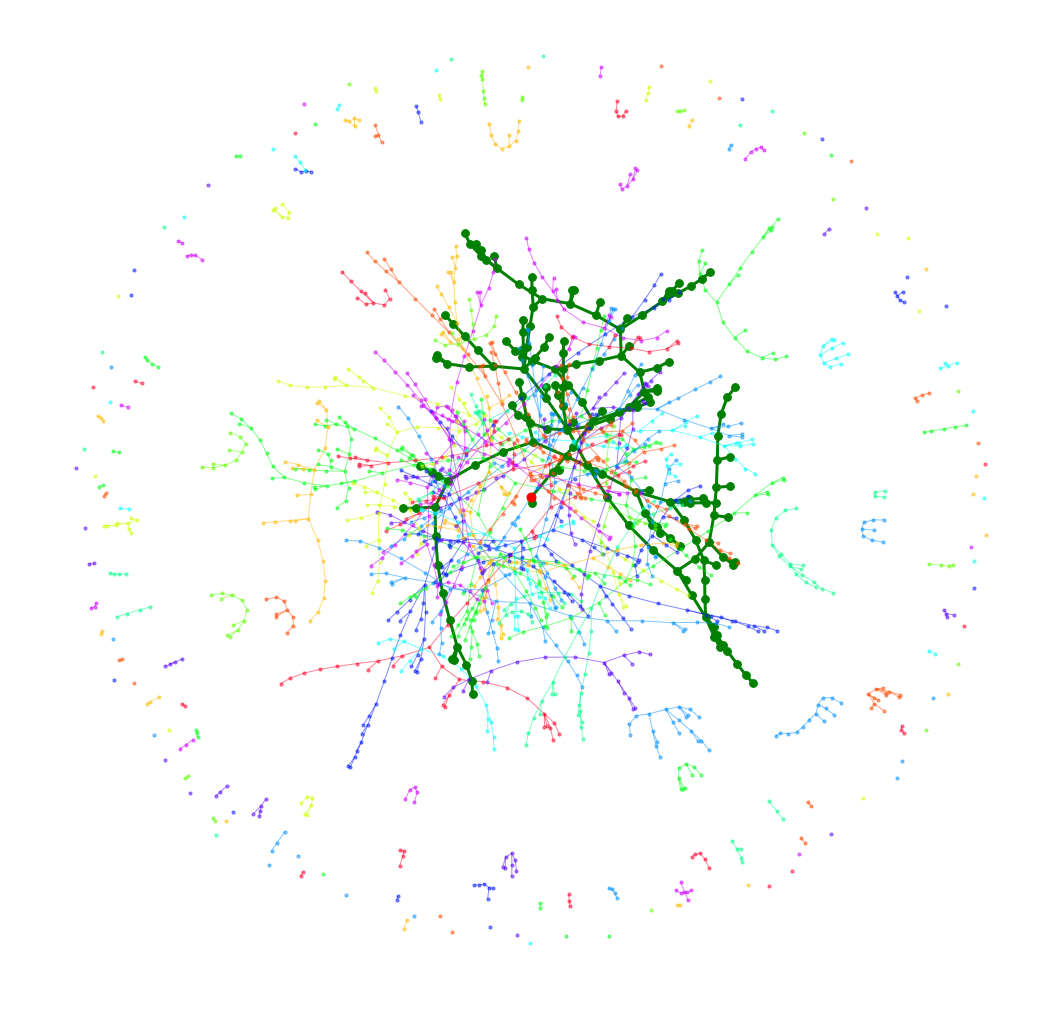

In [50]:
plt.figure(figsize=(18,18))
plt.axis('off')
for g in nx.connected_component_subgraphs(G):
    c = to_hex(next(colour_cycle)) # not necessary for node_color, but edge_color gets confused by the rgba tuple
    if 0 in g:
        nx.draw(g, node_size=60, pos=pos, node_color='green', edge_color='green', width=3)
    else:
        nx.draw(g, node_size=10, pos=pos, alpha=0.5, node_color=c, edge_color=c)
    
nx.draw_networkx_nodes(G, nodelist=[0], pos=pos, node_size=80, node_color='red')
plt.savefig('day12.png')

In [46]:
nx.write_graphml(G, 'day12.graphml')